In [221]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [222]:
# reading csv file to get the data
av_ds = pd.read_csv('avocado.csv')
av_ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# Printing head of the data of 1500 rows which will be used for further processing
ds = av_ds.head(1500)

In [224]:
print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (1500, 14)
Shape of dataset after removing duplicates:  (1500, 14)


In [225]:
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,45.0,14-02-2016,0.82,6807283.15,1998149.71,1974912.11,278558.48,2555662.85,2207054.69,333029.79,15578.37,conventional,2016.0,California
1496,46.0,07-02-2016,0.70,10361698.17,2930343.28,3950852.38,424389.60,3056112.91,2693843.02,344774.59,17495.30,conventional,2016.0,California
1497,47.0,31-01-2016,0.88,6506673.96,2126066.85,2069192.92,287234.03,2024180.16,1874982.24,134692.75,14505.17,conventional,2016.0,California
1498,48.0,24-01-2016,0.88,6246380.73,1230068.19,2457751.77,272665.17,2285895.60,2122673.09,147881.99,15340.52,conventional,2016.0,California


In [226]:
ds.shape

(1500, 14)

In [227]:
# Checking columns of dataset
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [228]:
# Checking datatypes of columns
ds.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

# Statistical Summary

In [229]:

ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000
mean,27.164000,1.071533,1.609088e+06,6.506221e+05,6.145873e+05,5.047160e+04,2.934071e+05,2.486180e+05,4.260156e+04,2187.511707,2015.153333
std,14.765448,0.185364,4.451398e+06,1.957018e+06,1.679916e+06,1.383050e+05,7.586402e+05,6.481144e+05,1.183651e+05,7482.631600,0.360429
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.750000,0.970000,1.476492e+05,2.013010e+04,4.185570e+04,8.672775e+02,3.587820e+04,2.963462e+04,5.125525e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.073439e+05,8.411721e+04,1.243290e+05,7.360670e+03,7.460980e+04,6.301849e+04,4.785235e+03,0.000000,2015.000000
75%,40.000000,1.190000,9.904908e+05,3.811823e+05,4.868930e+05,3.085165e+04,1.582093e+05,1.468208e+05,3.005311e+04,409.167500,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


There is not particular order followed between mean and median. But most of mean are greater than median

# Data Visualization

In [230]:
# checking if null values are present in the dataset
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [231]:
# checking if NaN values are present in the dataset
ds.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

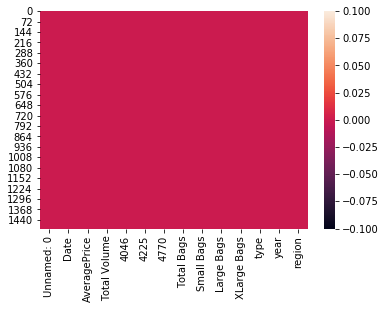

In [232]:
# Visualization through heatmap for null values check
sns.heatmap(ds.isnull())
plt.show()

# Checking correlation in the dataset

In [233]:
ds.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.047789,0.086103,0.087425,0.087730,0.069964,0.072674,0.075286,0.057268,-0.058706,0.013448
AveragePrice,-0.047789,1.000000,-0.134959,-0.187113,-0.085111,-0.095324,-0.103354,-0.089141,-0.171741,-0.041001,0.144857
Total Volume,0.086103,-0.134959,1.000000,0.985710,0.987123,0.934243,0.968644,0.961504,0.910698,0.520289,-0.000516
4046,0.087425,-0.187113,0.985710,1.000000,0.951972,0.898781,0.932237,0.924009,0.885633,0.473206,-0.036681
4225,0.087730,-0.085111,0.987123,0.951972,1.000000,0.927698,0.952795,0.944905,0.901071,0.503345,-0.003079
4770,0.069964,-0.095324,0.934243,0.898781,0.927698,1.000000,0.926654,0.923804,0.840125,0.644789,0.031291
Total Bags,0.072674,-0.103354,0.968644,0.932237,0.952795,0.926654,1.000000,0.997317,0.910532,0.600006,0.092707
Small Bags,0.075286,-0.089141,0.961504,0.924009,0.944905,0.923804,0.997317,1.000000,0.878042,0.609522,0.109571
Large Bags,0.057268,-0.171741,0.910698,0.885633,0.901071,0.840125,0.910532,0.878042,1.000000,0.444945,-0.020136
XLarge Bags,-0.058706,-0.041001,0.520289,0.473206,0.503345,0.644789,0.600006,0.609522,0.444945,1.000000,0.227257


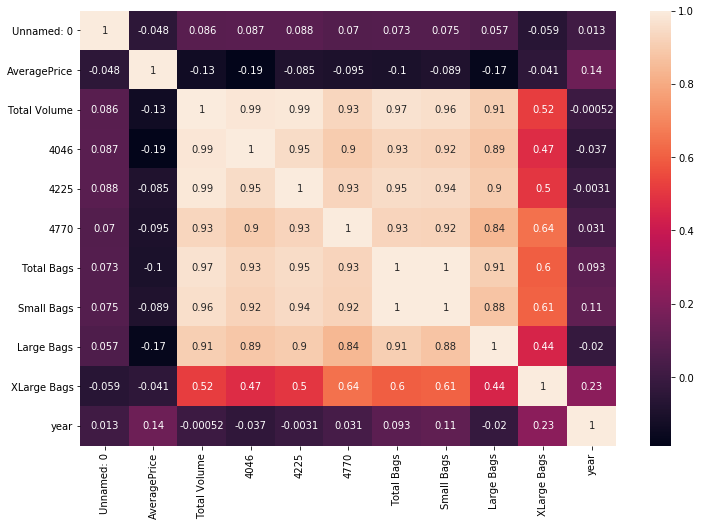

In [234]:
# Corelation through heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(ds.corr(), annot=True)

In [235]:
# Checking the unique values of 'type', as it contains only single value as 'conventional', we can drop the column
ds['type'].unique()

array(['conventional'], dtype=object)

In [236]:
# Checking the unique values of 'region', which will be used for classification
ds['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# plotting outliers

Plotting the outlier , so that we can remove it and our algorithm will work properly

# Univariate analysis

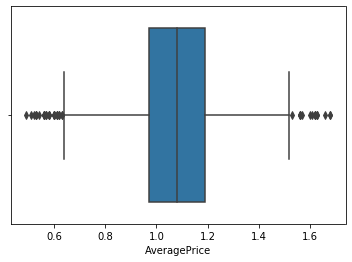

In [237]:
sns.boxplot(ds['AveragePrice'])
plt.show()

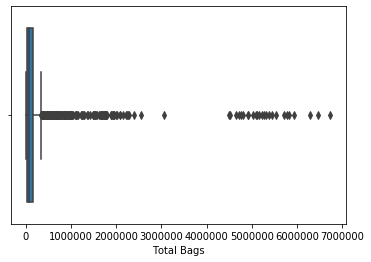

In [238]:
sns.boxplot(ds['Total Bags'])
plt.show()

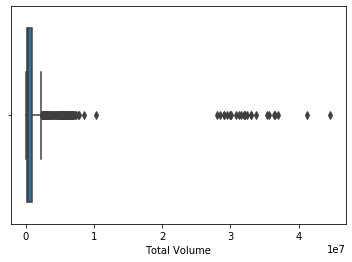

In [239]:
sns.boxplot(ds['Total Volume'])
plt.show()

BoxenPlot: By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.



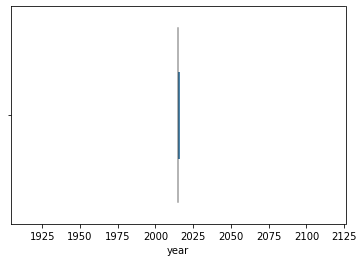

In [240]:
sns.boxenplot(ds['year'])
plt.show()

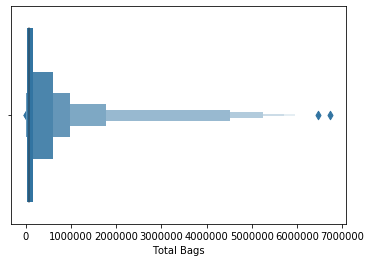

In [241]:
sns.boxenplot(ds['Total Bags'])
plt.show()

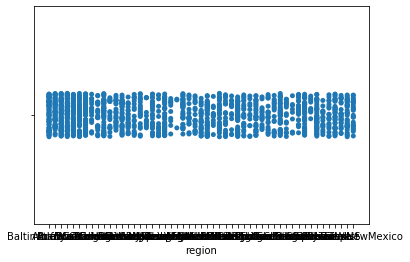

In [242]:
sns.stripplot(ds['region'])
plt.show()

Violin plot shows where the more 'AveragePrice' lies

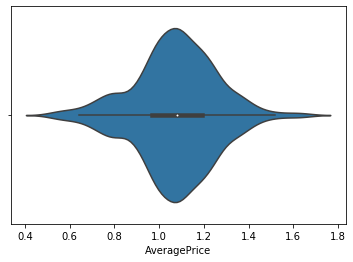

In [243]:
sns.violinplot(ds['AveragePrice'])
plt.show()

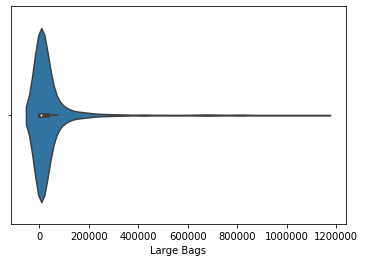

In [244]:
sns.violinplot(ds['Large Bags'])
plt.show()

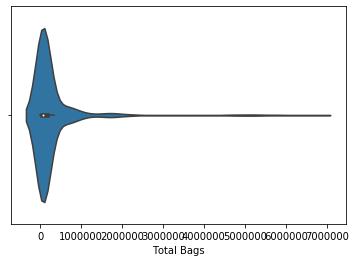

In [245]:
sns.violinplot(ds['Total Bags'])
plt.show()

Countplot shows the count of each region in the dataset for Avocado

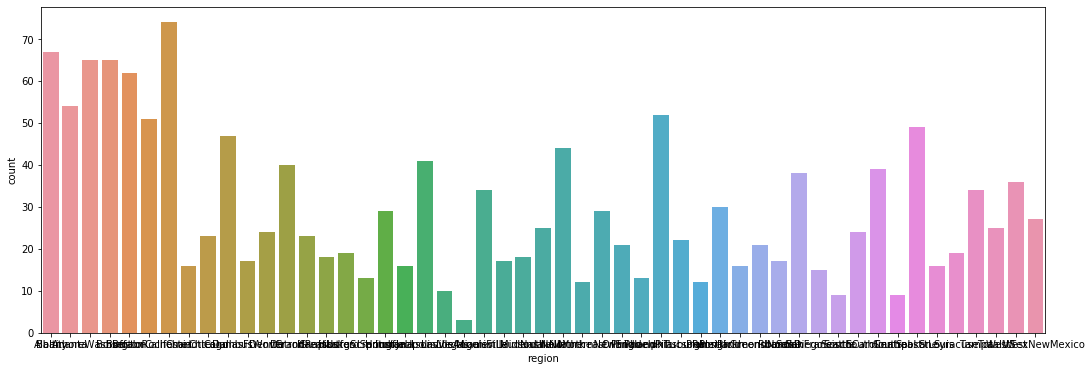

In [246]:
plt.figure(figsize=(18,6))
sns.countplot(ds['region'])
plt.show()

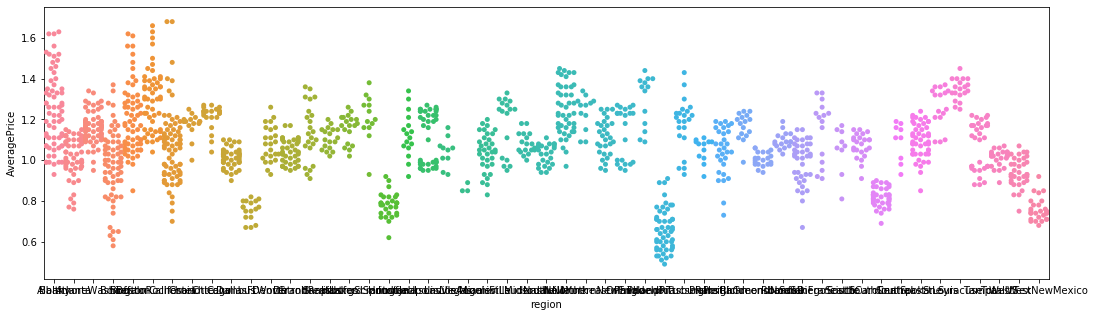

In [247]:
plt.figure(figsize=(18, 5))
sns.swarmplot(x='region', y='AveragePrice', data=ds)
plt.show()

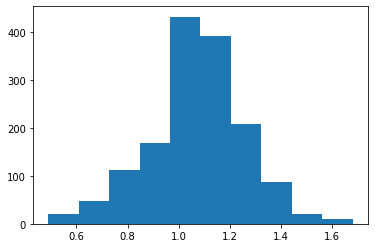

In [248]:
plt.hist(ds['AveragePrice'])
plt.show()

Histogram is used to show the frequency distribution of region

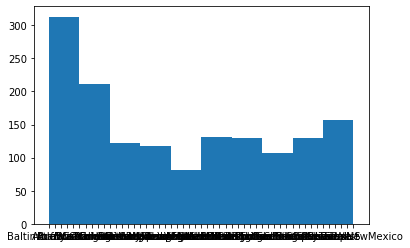

In [249]:

plt.hist(ds['region'])
plt.show()

Below distribution plot shows how data is skewed for 'AveragePrice'. To check the skewness for the data,
different distribution plots are plotted

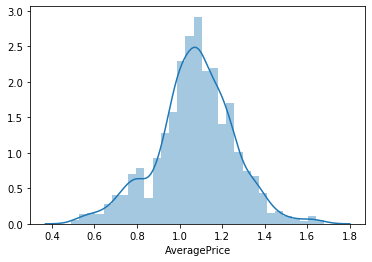

In [250]:

sns.distplot(ds['AveragePrice'])
plt.show()


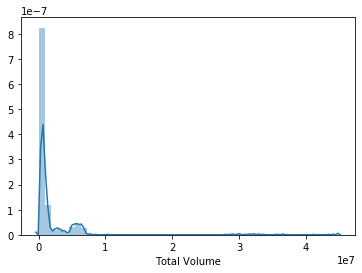

In [251]:
sns.distplot(ds['Total Volume'])
plt.show()

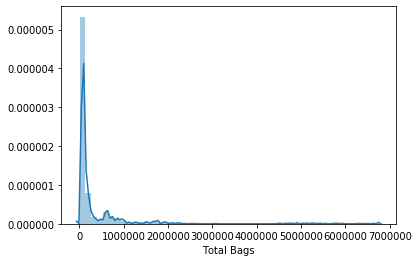

In [252]:
sns.distplot(ds['Total Bags'])
plt.show()


Bivariate Analysis between various features. It shows how the features are related to each other

<Figure size 1296x360 with 0 Axes>

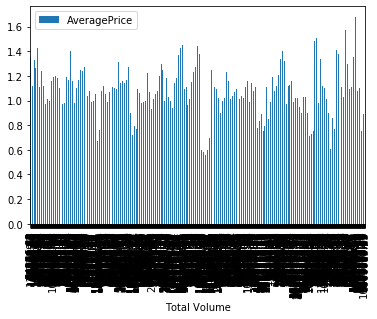

In [253]:
plt.figure(figsize=(18, 5))
ds.plot(x='Total Volume', y='AveragePrice', kind='bar')
plt.show()

<Figure size 1296x360 with 0 Axes>

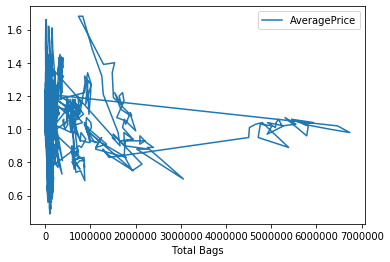

In [254]:
plt.figure(figsize=(18, 5))
ds.plot(y='AveragePrice', x='Total Bags', kind='line')
plt.show()

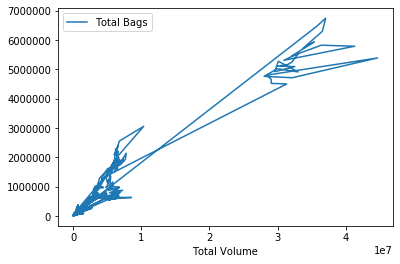

In [255]:
ds.plot(x='Total Volume', y='Total Bags')
plt.show()

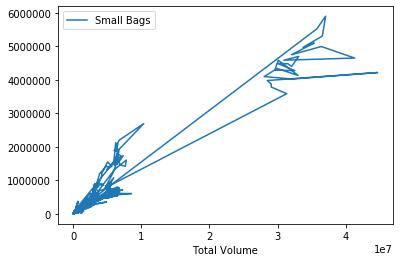

In [256]:
ds.plot(x='Total Volume', y='Small Bags')
plt.show()

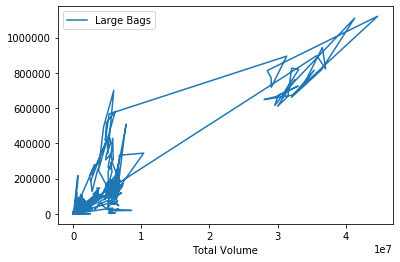

In [257]:
ds.plot(x='Total Volume', y='Large Bags')
plt.show()

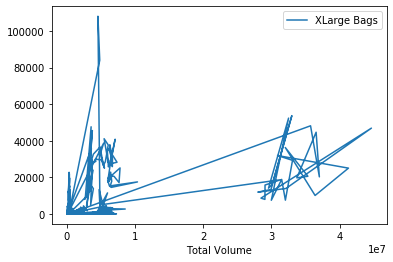

In [258]:
ds.plot(x='Total Volume', y='XLarge Bags')
plt.show()

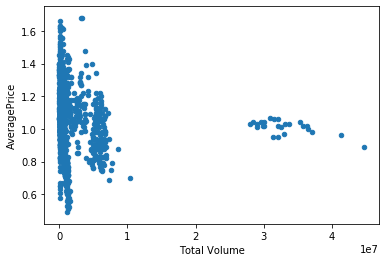

In [259]:
ds.plot(x='Total Volume', y='AveragePrice',  kind='scatter')
plt.show()

In [260]:
ds.groupby(['region'])['Total Bags'].count()

region
Albany                 67
Atlanta                54
BaltimoreWashington    65
Boise                  65
Boston                 62
BuffaloRochester       51
California             74
Charlotte              16
Chicago                23
Columbus               47
DallasFtWorth          17
Denver                 24
Detroit                40
GrandRapids            23
GreatLakes             18
HarrisburgScranton     19
HartfordSpringfield    13
Houston                29
Indianapolis           16
Jacksonville           41
LasVegas               10
LosAngeles              3
Louisville             34
MiamiFtLauderdale      17
Midsouth               18
Nashville              25
NewYork                44
Northeast              12
NorthernNewEngland     29
Orlando                21
Philadelphia           13
PhoenixTucson          52
Pittsburgh             22
Plains                 12
Portland               30
RaleighGreensboro      16
RichmondNorfolk        21
Roanoke                17
SanDi

In [261]:
ds.groupby(['region'])['AveragePrice'].sum()

region
Albany                 82.99
Atlanta                54.65
BaltimoreWashington    75.46
Boise                  63.37
Boston                 74.74
BuffaloRochester       66.38
California             78.65
Charlotte              18.80
Chicago                27.94
Columbus               47.59
DallasFtWorth          12.85
Denver                 25.94
Detroit                41.65
GrandRapids            26.15
GreatLakes             19.93
HarrisburgScranton     21.99
HartfordSpringfield    15.72
Houston                22.64
Indianapolis           18.02
Jacksonville           45.66
LasVegas               10.41
LosAngeles              2.59
Louisville             35.46
MiamiFtLauderdale      20.00
Midsouth               19.46
Nashville              25.71
NewYork                54.94
Northeast              14.84
NorthernNewEngland     32.22
Orlando                23.80
Philadelphia           16.82
PhoenixTucson          34.31
Pittsburgh             25.93
Plains                 12.62
Portlan

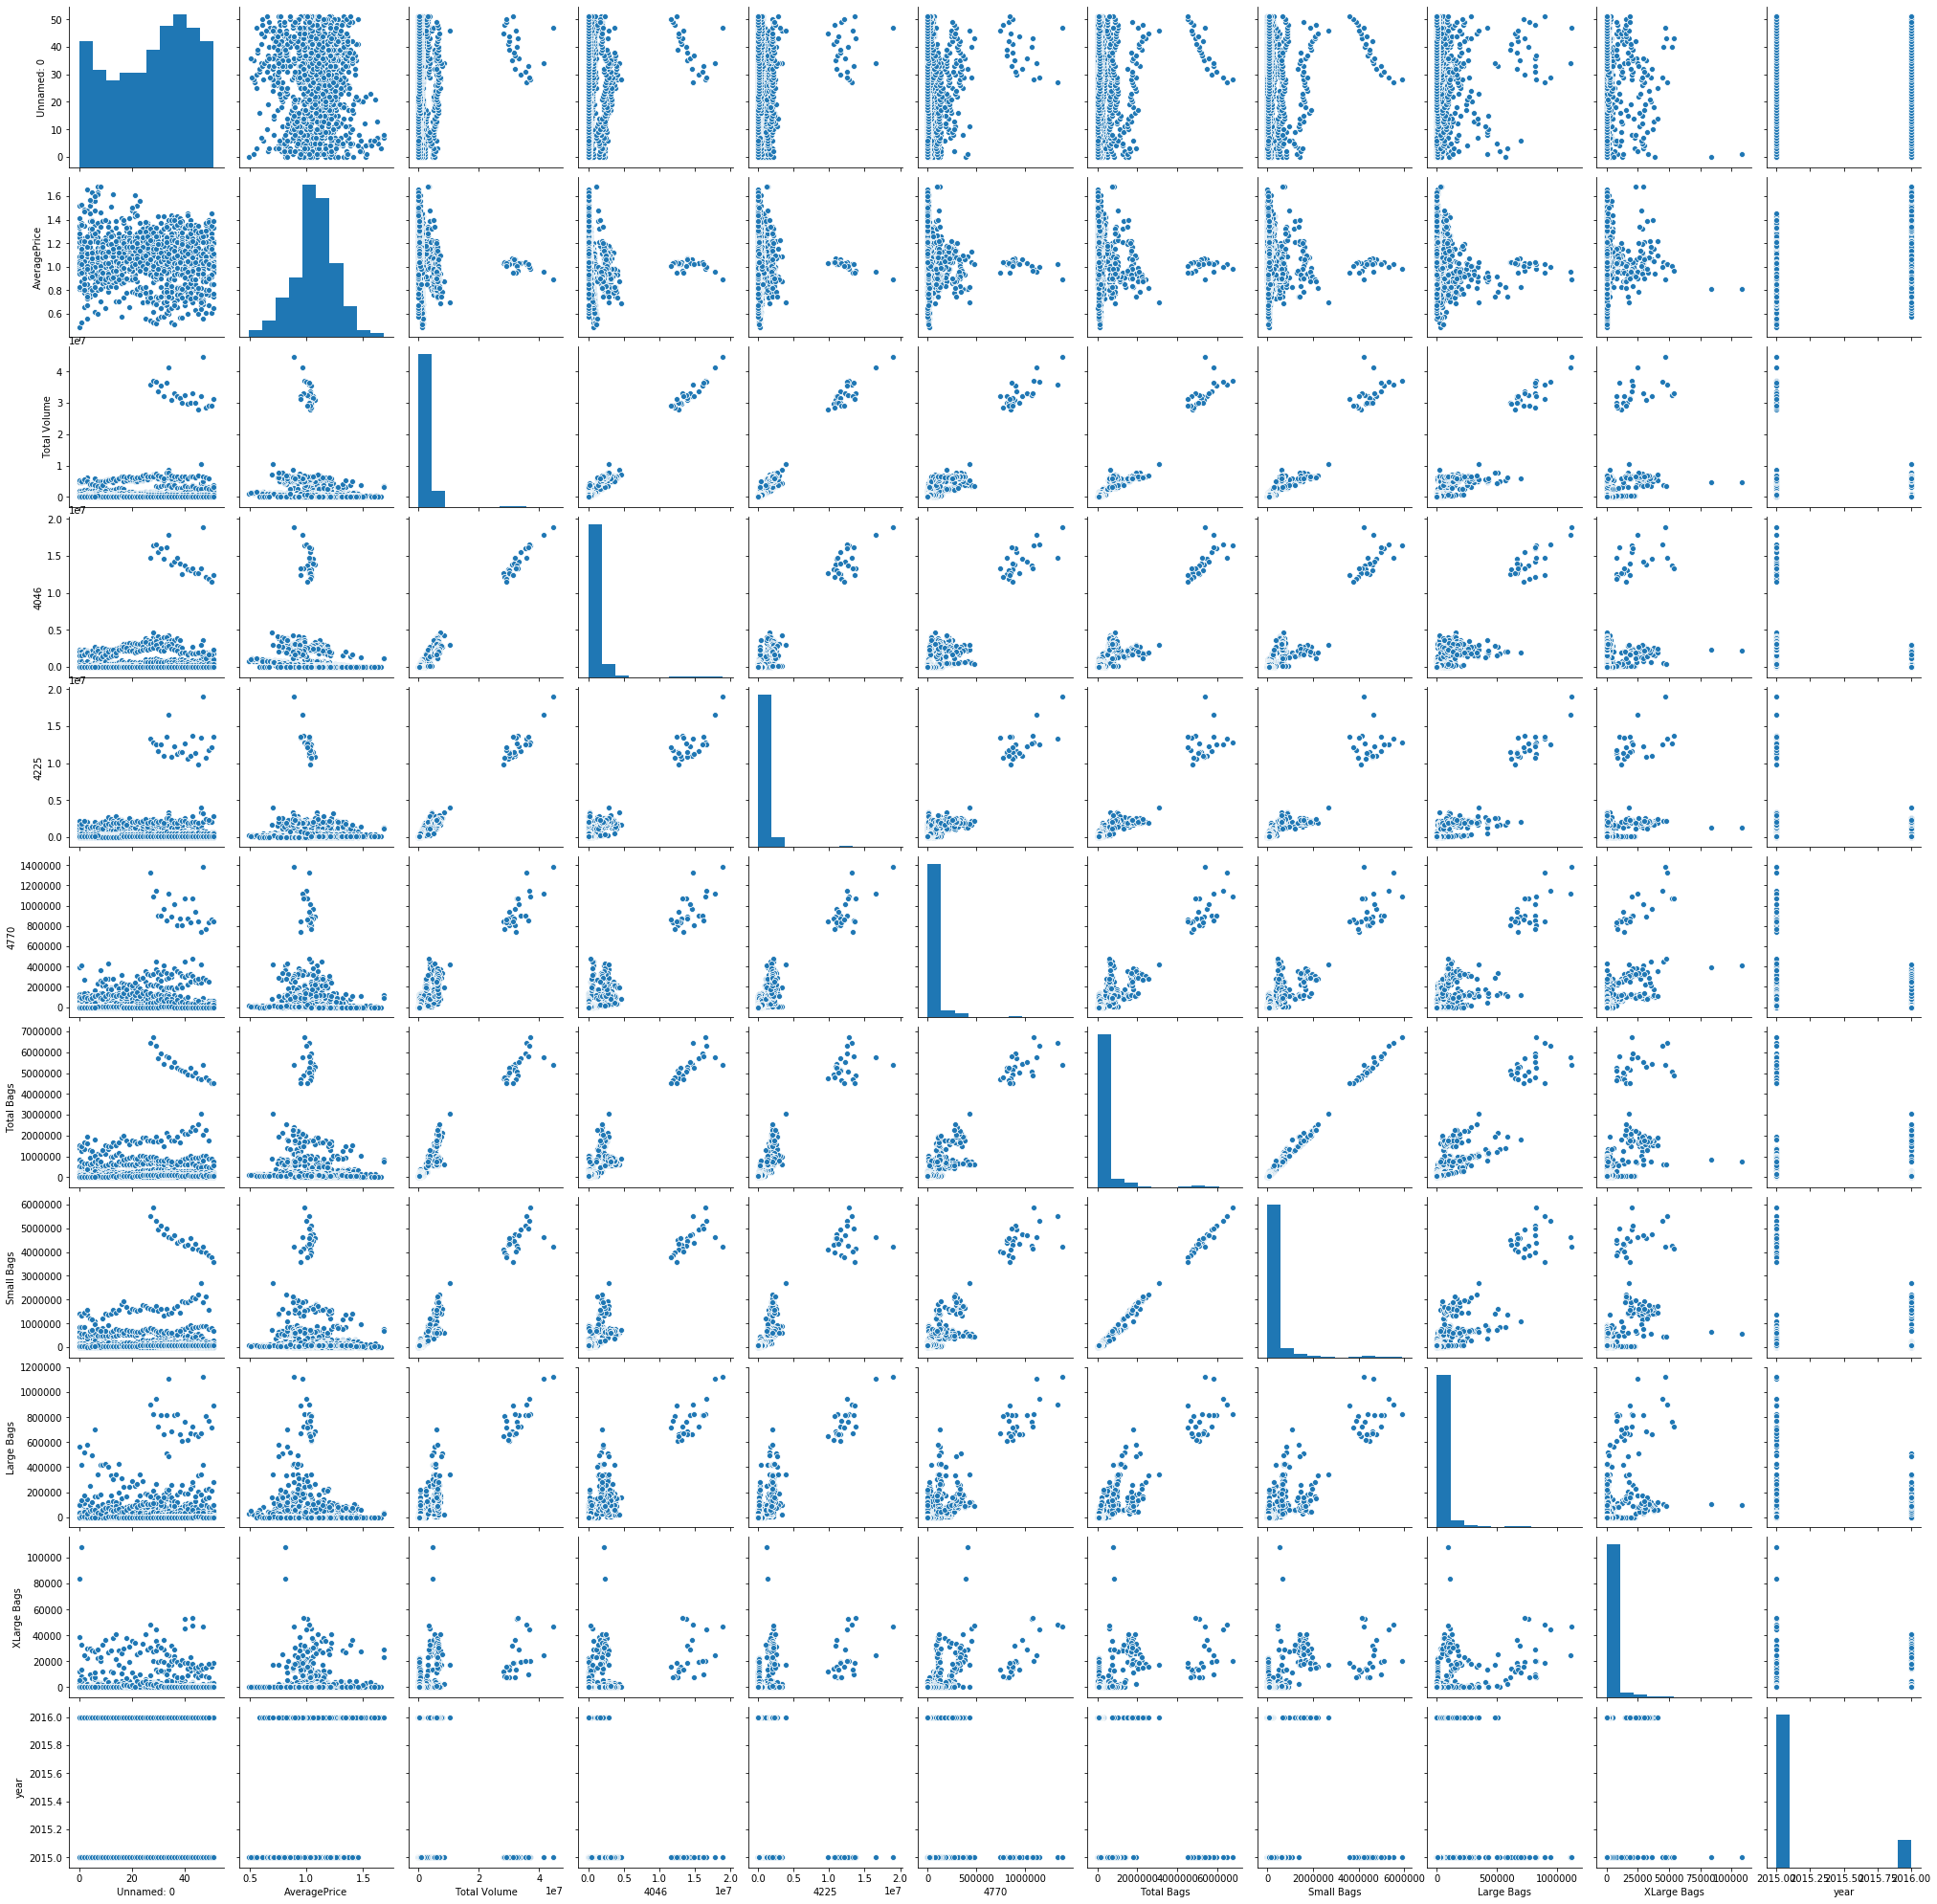

In [262]:
# Pairplot shows the relation of all the parameters with each other, how one parameter will vary with the other
sns.pairplot(ds)
plt.show()

LabelEncoder is used to change the categorical data into numerical one for machine

In [263]:
le = LabelEncoder()
ds['region'] = le.fit_transform(ds['region'].astype(str))


Dropping the columns 'Date' and 'type' as we don't find it to be significant

In [264]:
ds.drop(columns=['Date', 'type'], inplace=True)

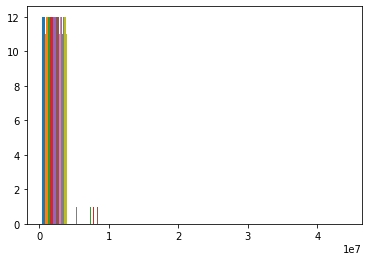

In [265]:
plt.hist(ds)
plt.show()

In [266]:
ds.dtypes

Unnamed: 0      float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region            int32
dtype: object

Checking the skewness of the data

In [267]:

ds.skew()

Unnamed: 0     -0.252843
AveragePrice   -0.168309
Total Volume    6.186663
4046            6.026082
4225            6.379553
4770            5.398791
Total Bags      5.392255
Small Bags      5.379905
Large Bags      5.165092
XLarge Bags     5.770136
year            1.926204
region          0.268156
dtype: float64

In [268]:
# Remove skewness 
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.log1p(ds[col])

In [269]:
ds.skew()

Unnamed: 0     -0.252843
AveragePrice   -0.168309
Total Volume    0.654462
4046           -0.164883
4225            0.168892
4770           -0.343696
Total Bags      0.683148
Small Bags      0.702207
Large Bags     -0.901512
XLarge Bags     0.781811
year            1.926204
region          0.268156
dtype: float64

In [270]:
for i in range(1, 5):
    # Remove skewness 
    for col in ds.columns:
        if ds.skew().loc[col] > 0.55:
            ds[col] = np.log1p(ds[col])

In [271]:
ds.skew()

Unnamed: 0     -0.252843
AveragePrice   -0.168309
Total Volume    0.427863
4046           -0.164883
4225            0.168892
4770           -0.343696
Total Bags      0.356648
Small Bags      0.398358
Large Bags     -0.901512
XLarge Bags     0.344410
year            1.926204
region          0.268156
dtype: float64

In [272]:
# Checking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (1500, 12)
After removing zscore:  (1492, 12)


In [273]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['AveragePrice'])
y = ds_final['AveragePrice']

In [274]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [275]:
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-1.849584,-1.450861,-1.824859,-0.572886,-1.814097,-1.851871,-1.676800,-0.958676,-0.904343,-0.420305,-1.326198
1,-1.781691,-1.582114,-2.008340,-0.689522,-1.740870,-1.771011,-1.597356,-0.945839,-0.904343,-0.420305,-1.326198
2,-1.713798,-0.958139,-1.938268,-0.164861,-1.430924,-1.911910,-1.737244,-0.929566,-0.904343,-0.420305,-1.326198
3,-1.645905,-1.281098,-1.787356,-0.409191,-1.657042,-2.227711,-2.055773,-0.854373,-0.904343,-0.420305,-1.326198
4,-1.578012,-1.643118,-1.865975,-0.700139,-1.640463,-2.168741,-2.006581,-0.741112,-0.904343,-0.420305,-1.326198
...,...,...,...,...,...,...,...,...,...,...,...
1487,1.205601,1.813976,1.404715,1.534252,1.551498,2.264561,2.267698,1.424692,1.519236,2.379226,-0.954625
1488,1.273494,2.061808,1.568222,1.941145,1.715458,2.368408,2.381675,1.434803,1.530333,2.379226,-0.954625
1489,1.341387,1.786964,1.431213,1.561618,1.563442,2.127390,2.173363,1.160618,1.512350,2.379226,-0.954625
1490,1.409280,1.762483,1.197542,1.662599,1.543171,2.199184,2.245236,1.187870,1.517755,2.379226,-0.954625


In [276]:
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1495    0.82
1496    0.70
1497    0.88
1498    0.88
1499    0.90
Name: AveragePrice, Length: 1492, dtype: float64

In [277]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [278]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x, y)


Max r2 score corresponding to  75  is:  0.44584597784917934


In [279]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1,100)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x, y)
gknr.best_params_

{'n_neighbors': 26}

In [280]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors =26)
r_state = max_r2_score(knr, x, y)


Max r2 score corresponding to  73  is:  0.6629342358739279


In [281]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x, y, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x, y, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.05464761645262448
Standard deviation for r2 score in linear regression:  0.16401351085726434

*****************

Mean r2 score for KNN regression:  0.08582175969570487
Standard deviation for r2 score in KNN regression:  0.20129769583991172


In [282]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x, y)
clf.best_params_

{'alpha': 0.01}

In [283]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.01)
r_state = max_r2_score (lsreg, x, y)


Max r2 score corresponding to  81  is:  0.35186141140403004


In [284]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [285]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x, y, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.31385909699766346
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.11394471287885266


In [286]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x, y)


Max r2 score corresponding to  65  is:  0.6596620684784111


In [287]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 150, 200, 250, 300], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 200}

In [288]:
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=1, n_estimators=100)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x, y, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.25268657498711866
Standard Deviation in  r2 score for Ada Boosting Regression:  0.26422710082975176


In [289]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x, y)


Max r2 score corresponding to  96  is:  0.8903733258376899


In [290]:
# we tried all the models and till now AdaBoostRegressor Regression is the best
# random state corresponding to highest r2 score is 74

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=96, test_size = 0.20)
ada_reg = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), learning_rate=1, n_estimators=100)
ada_reg.fit(x_train, y_train)
y_pred =  ada_reg.predict(x_test)
print (y_pred)

[1.19 0.85 0.75 1.18 1.24 0.93 1.04 1.19 1.09 1.03 1.16 1.26 1.16 0.72
 1.12 0.8  1.18 1.19 1.01 1.02 1.05 0.99 1.08 0.75 1.05 1.15 1.03 1.07
 0.97 1.13 1.21 1.2  1.29 1.   1.03 1.16 1.13 1.4  1.19 1.1  1.12 1.15
 0.91 0.79 1.32 1.02 0.95 1.14 1.32 1.03 1.02 0.92 0.82 0.88 1.03 1.19
 1.15 1.18 1.13 1.12 0.84 1.09 1.   1.06 1.11 1.32 0.89 1.26 1.09 1.15
 1.05 1.01 0.89 1.02 1.27 1.17 1.22 1.1  1.26 0.64 1.37 1.35 1.02 0.98
 0.86 1.4  1.29 1.12 1.1  1.12 1.17 0.94 1.19 0.77 1.03 1.38 1.05 0.71
 1.1  1.27 1.05 1.02 1.07 0.89 1.24 1.02 0.98 1.13 1.33 1.4  1.11 1.34
 1.04 1.2  1.06 1.05 1.22 1.37 0.98 1.25 1.23 0.99 0.83 1.09 1.14 0.79
 1.19 1.12 0.92 0.99 1.05 1.15 1.12 0.82 1.01 0.75 0.98 1.03 1.46 1.08
 0.92 0.96 1.03 1.12 1.15 0.58 1.28 1.32 0.97 1.04 1.1  1.04 1.09 1.12
 0.84 1.07 1.4  1.23 0.91 1.02 1.04 1.08 0.91 0.79 1.09 1.06 1.05 1.19
 1.22 1.11 1.19 1.25 1.18 1.   1.19 0.74 1.15 0.99 1.03 1.16 1.1  1.13
 1.32 1.15 1.12 1.19 1.1  0.67 1.05 1.07 1.52 0.76 1.07 1.09 0.99 1.32
 0.87 

In [291]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_reg_avocado.csv')

In [292]:
# Lets find RMSE and r2 sciore using sklearn.metrics

print ("RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print ('r2 score is: ', r2_score(y_test, y_pred))

RMSE is:  0.0634567242523817
r2 score is:  0.8857126022240702


In [293]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(ada_reg, 'Prj_reg_avocado.pkl')
#clf = joblib.load('Prj_reg_avocado.pkl')
#clf.predict(x_test)

['Prj_reg_avocado.pkl']

# Classification for Dataset based on region

In [294]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['region'])
y = ds_final['region']

In [295]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [296]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [297]:
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,-1.849584,1.431982,-1.450861,-1.824859,-0.572886,-1.814097,-1.851871,-1.676800,-0.958676,-0.904343,-0.420305
1,-1.781691,1.542404,-1.582114,-2.008340,-0.689522,-1.740870,-1.771011,-1.597356,-0.945839,-0.904343,-0.420305
2,-1.713798,-0.776475,-0.958139,-1.938268,-0.164861,-1.430924,-1.911910,-1.737244,-0.929566,-0.904343,-0.420305
3,-1.645905,0.051696,-1.281098,-1.787356,-0.409191,-1.657042,-2.227711,-2.055773,-0.854373,-0.904343,-0.420305
4,-1.578012,1.155924,-1.643118,-1.865975,-0.700139,-1.640463,-2.168741,-2.006581,-0.741112,-0.904343,-0.420305
...,...,...,...,...,...,...,...,...,...,...,...
1487,1.205601,-1.383801,1.813976,1.404715,1.534252,1.551498,2.264561,2.267698,1.424692,1.519236,2.379226
1488,1.273494,-2.046338,2.061808,1.568222,1.941145,1.715458,2.368408,2.381675,1.434803,1.530333,2.379226
1489,1.341387,-1.052532,1.786964,1.431213,1.561618,1.563442,2.127390,2.173363,1.160618,1.512350,2.379226
1490,1.409280,-1.052532,1.762483,1.197542,1.662599,1.543171,2.199184,2.245236,1.187870,1.517755,2.379226


In [298]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    6
1496    6
1497    6
1498    6
1499    6
Name: region, Length: 1492, dtype: int32

# Using the classifier Algorithm

In [299]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [301]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [302]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  55  is:  0.9632107023411371
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy score:  0.9635258358662614


cross val score:  0.9363892617449665


roc auc score:  0.04559748427672955


classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        11
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        12
           5       1.00      0.77      0.87        13
           6       1.00      1.00      1.00        12
           7       0.25      1.00      0.40         1
           8       1.00      0.90      0.95        10
 

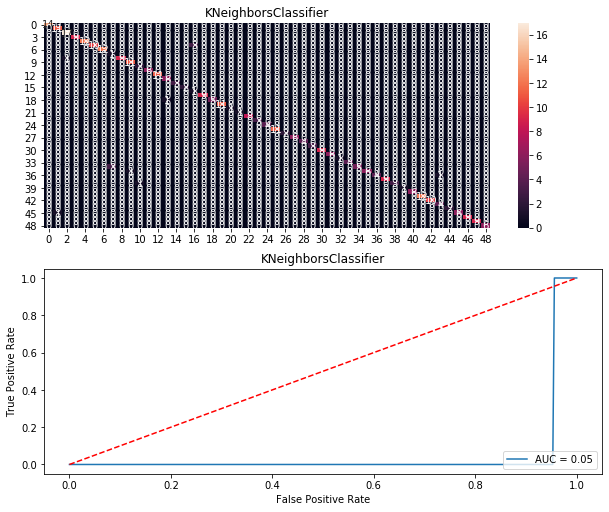

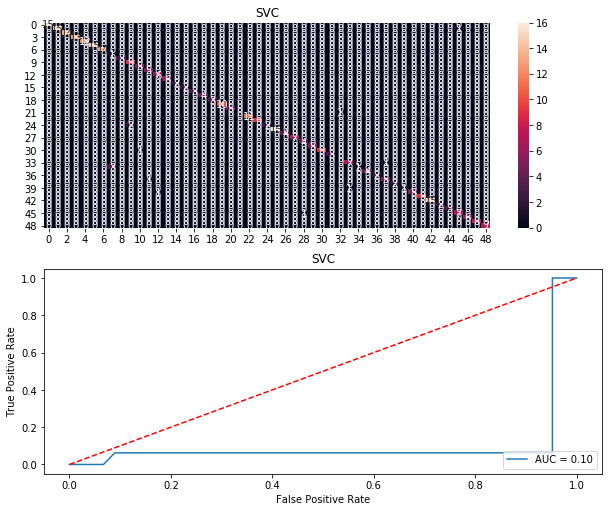

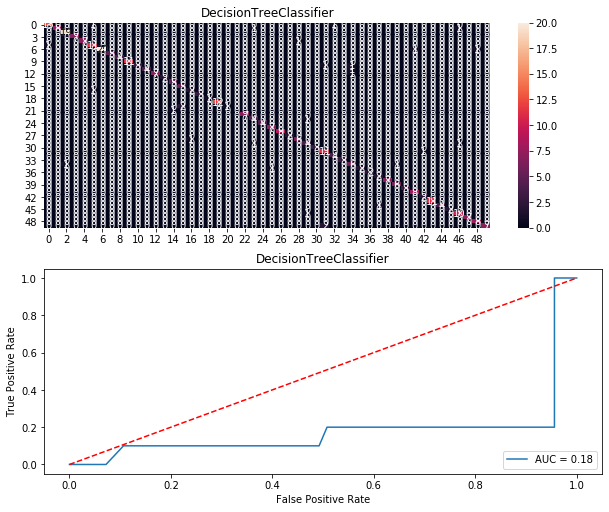

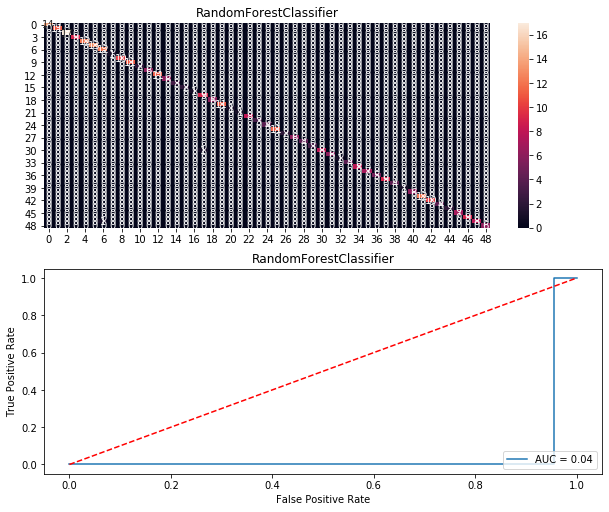

In [303]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .22)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [304]:
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,96.352584,93.638926,4.559748,55
1,SVC,96.048632,94.108277,10.253594,57
2,DecisionTreeClassifier,91.489362,86.599105,17.617555,75
3,RandomForestClassifier,99.392097,96.718568,4.402516,55


I choose RandomForestClassifier as my final model because it performs very well on dataset



In [305]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_estimators': [100,150, 200, 250, 300], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2']
}
gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=10)
gsc.fit(x,y)
gsc.best_params_


{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=55, test_size = 0.20)
rfc = RandomForestClassifier(criterion= 'gini', max_features='sqrt', n_estimators= 200)
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[ 0  1 35  2 12 39 19 22  4  2 49 32  1 47 26  8  6 41 44 45 36 35 48 32
 38  8 11 50 44 46 16  1 38  8 32 41 35 44  4 10 26 28 28 12 23  8 23  0
  5  6 42  4  3 17 39 14 22 38 26  0  9 30  5 36  5 19 44 42  4 31 49  1
 10 39  2  5 41  2 26 35 13 36  9  0  5 42  9 37 36 17  0 41 44  1  6 17
  1  3 31 33 22  0 47  3 42 36 19  5 17 27 48  6  1  8 24 28  4 46  5  2
 11 38 29  6 17 27 37 12 26 24 11 31  2 30 28  9 38 12 18 36  5 44 15 11
 48 15 17 28 12 13  0 39 35 11  0 42 19 19 22  3  0 29 42 49 41  9 17 22
  6 34  6 34  2  2 31 18 13 12 49 29 26 13  0 49 14 48  8 29 47 22 42 37
 45 42  1  8 38  0  4 12 35 12  6 12  9 38 22 12 50 22 38  3 34  9  5 50
 41 19 35  8 19  1  2 30  6 47  3 44  6 50  7 18 24  0  5 42  4 26  5  1
 26 45 24 31 28 48 32 31  6 48  9 48 49 26 32 19 18 17  6 50  5  4 35  3
 26 32 19 20  3  9  4 49 17  5 36 45 31 42 49 40 34  8  2  2 31  3  2  9
 13  4 48 29 12  2  4  2 42 44 48]


In [307]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_cls_avocado.csv')

accuracy score:  0.9933110367892977
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        13
           6       0.92      1.00      0.96        11
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       

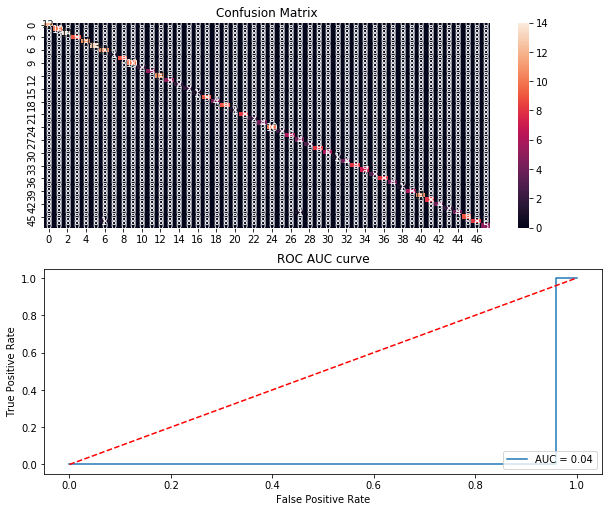

In [308]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [309]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(rfc, 'Prj_cls_avocado.pkl')
#clf = joblib.load('Prj_cls_avocado.pkl')
#clf.predict(x_test)

['Prj_cls_avocado.pkl']